## INTRODUCTION
* [Reading data](#read)
* [Checking first 10 data for look features](#head)
* [Checking correlation between features](#cor)
* [Checking data types](#info)
* [Converting feature to int](#con)
* [Normalization](#norm)
* [Total "class" values count](#count)
* [Splitting data to train and test](#split)
* [Implementing KNN](#knn)

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


<a id="#read"> </a>
## READ DATA

In [28]:
data= pd.read_csv('../input/column_2C_weka.csv')

<a id="#head"></a>
## CHECKING FIRST 10 DATA FOR LOOK FEATURES

In [29]:
data.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


<a id="#cor"> </a>
## CHECKING CORRELATION BETWEEN FEATURES

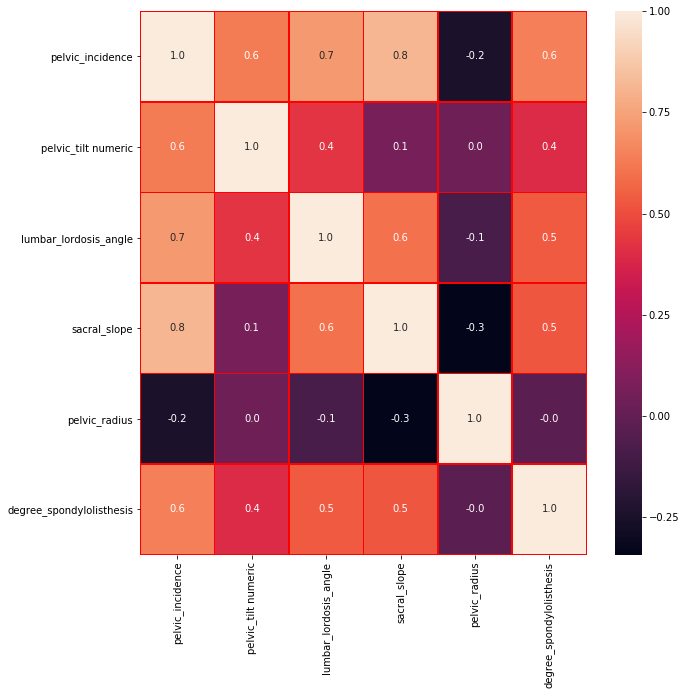

In [30]:
f, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="#info"> </a>
## CHECKING DATA TYPES

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null int64
dtypes: float64(6), int64(1)
memory usage: 17.0 KB


<a id="#con"> </a>
## CONVERTING FEATURE TO INT
As we can see "class" is "object". We can't use "object" for classifaciton problems. The Logistic Algortihm is has to be 2 situation. For this dataset our situatins is "Abnormal" or "Normal" and there outputs has to be 0 or 1, so lets convert to "int"

In [31]:
data["class"] = [1 if(each == "Abnormal") else 0 for each in data["class"]]

y= data["class"].values
x_data= data.drop(["class"],axis=1)

<a id="norm"> </a>
## NORMALIZATION

In [32]:
x= (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

<a id="count"> </a>
## TOTAL CLASS VALUES COUNT    

Abnormal    210
Normal      100
Name: class, dtype: int64

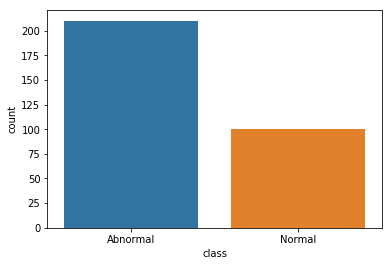

In [13]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

<a id="#split"> </a>
## SPLITTING DATA TO TRAIN AND TEST

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=1)

<a id="knn"> </a>
## IMPLEMENTING KNN
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.7096774193548387


As we can see accuracy %70. Its not a good result for this algortihm we can change parameters for reach optimal result.

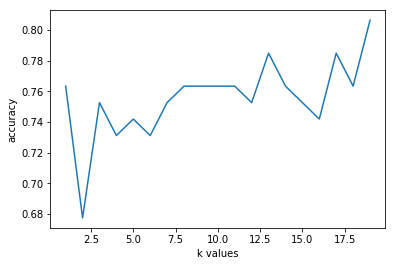

In [41]:
score_list = []
for each in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,20),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

If we set "n_neighbors" to 19 we will reach best accuarcy.